In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer  

In [2]:
import numpy as np
import pandas as pd 
import re

In [3]:
df = pd.read_csv('./data/final_dataset_clean.csv')
# df = pd.read_csv('./data/final_dataset.csv')
# df = pd.read_csv('./data/final_dataset.csv', usecols=['review'])

In [4]:
def invalidity_clear(text):
    text = re.sub(r"https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)", '', text)
    text = re.sub(r'[^\w\s]', '', text, re.UNICODE)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r"<.*?>", ' ', text)
    text = re.sub(r"[^\u0000-\u007F]+?", " ", text)
    text = text.lower()
    text = text.strip()
    text 
    return text

In [5]:
def lemmatizer(text):
      stop_words=set(nltk.corpus.stopwords.words('english'))
      word_tokenize=nltk.tokenize.word_tokenize
      le=WordNetLemmatizer()
      word_tokens=word_tokenize(text)
      tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
      cleaned_text=" ".join(tokens)
      return cleaned_text


In [9]:
df.dropna(inplace=True)
df.head()

,review
0,usual delayed blame someone inability incapac...
1,fantastic today cabin crew seat zone best exp...
2,couldnt book online arrived check find bumped ...
3,london heathrow mumbai boeing business class l...
4,keflav iceland london heathrow business class ...


In [6]:
def clean_text(text):
    text = invalidity_clear(text)
    text = lemmatizer(text)
    print("Cleaned, tokenized and lemmatized:", text)
    return text

Document length analysis


In [62]:
count_array = np.array([])
for entry in df['review']:
    count_array = np.append(count_array, len(entry.split()))

In [63]:
def details(count_array):
    print("mean:", count_array.mean())
    print("std:", count_array.std())
    print("max:", count_array.max())
    print("min:", count_array.min())
    print("median:", np.median(count_array))
    print("25th percentile:", np.percentile(count_array, 25))
    print("50th percentile:", np.percentile(count_array, 50))
    print("75th percentile:", np.percentile(count_array, 75))
details(count_array)

mean: 16.297620767711795
std: 26.556394374760867
max: 654.0
min: 1.0
median: 7.0
25th percentile: 3.0
50th percentile: 7.0
75th percentile: 17.0


In [64]:
indices = np.where(count_array < 10)[0]
len(indices)
df.reset_index(drop=True, inplace=True)
details(np.array([len(entry.split()) for entry in df['review']]))

mean: 16.297620767711795
std: 26.556394374760867
max: 654
min: 1
median: 7.0
25th percentile: 3.0
50th percentile: 7.0
75th percentile: 17.0


<Axes: ylabel='count'>

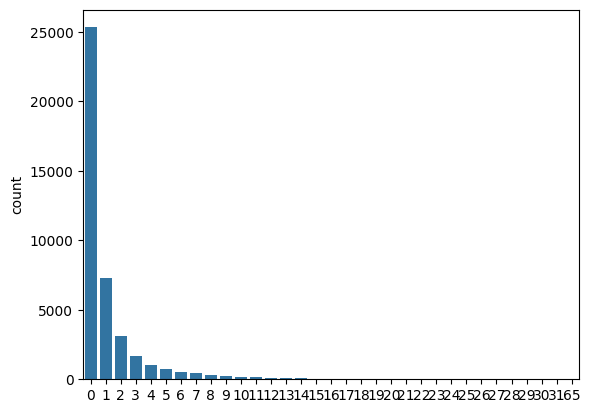

In [65]:
import seaborn as sns
labels = pd.cut(count_array, bins=range(0, int(max(count_array))+10, 10), labels=False)
sns.countplot(x=labels)

In [66]:
df.dropna(inplace=True)

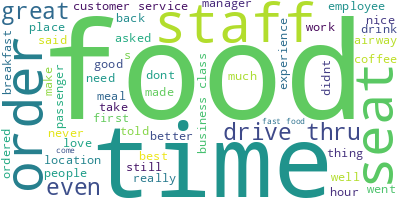

In [10]:
from wordcloud import WordCloud
long_string = ','.join(list(df['review']))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [11]:
import gensim as gs 

def get_corpus(df):
    corpus=[]
    for i in range(len(df)):
        corpus.append(df.iloc[i].split())
    return corpus
processed = get_corpus(df['review'])
dictionary = gs.corpora.Dictionary(processed)

In [12]:
count = 0
for k in dictionary.iteritems():
    print(k)
    count += 1
    if count > 10:
        break

(0, 'blame')
(1, 'delayed')
(2, 'delivering')
(3, 'demand')
(4, 'dont')
(5, 'enough')
(6, 'fulfil')
(7, 'hire')
(8, 'inability')
(9, 'incapacity')
(10, 'personnel')


In [14]:
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=100000)

In [15]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed]

In [16]:
bow_doc_69 = bow_corpus[69]

for i in range(len(bow_doc_69)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_69[i][0], 
                                                     dictionary[bow_doc_69[i][0]], 
                                                     bow_doc_69[i][1]))

Word 4 ("dont") appears 1 time.
Word 12 ("although") appears 1 time.
Word 17 ("cabin") appears 1 time.
Word 21 ("could") appears 1 time.
Word 24 ("crew") appears 1 time.
Word 40 ("food") appears 1 time.
Word 51 ("nice") appears 1 time.
Word 53 ("offering") appears 1 time.
Word 58 ("really") appears 1 time.
Word 62 ("seat") appears 1 time.
Word 72 ("time") appears 2 time.
Word 74 ("without") appears 1 time.
Word 92 ("rest") appears 2 time.
Word 113 ("lounge") appears 1 time.
Word 125 ("service") appears 2 time.
Word 136 ("even") appears 2 time.
Word 138 ("extra") appears 1 time.
Word 146 ("long") appears 1 time.
Word 148 ("made") appears 1 time.
Word 167 ("anything") appears 1 time.
Word 194 ("customer") appears 1 time.
Word 199 ("downhill") appears 1 time.
Word 224 ("happened") appears 1 time.
Word 243 ("never") appears 1 time.
Word 268 ("said") appears 1 time.
Word 296 ("word") appears 1 time.
Word 297 ("work") appears 1 time.
Word 333 ("last") appears 1 time.
Word 459 ("help") appear

In [17]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)

In [18]:
corpus_tfidf = tfidf[bow_corpus]
corpus_tfidf[69]

[(4, 0.07172895573605491),
 (12, 0.10254608851617858),
 (17, 0.07989819816932556),
 (21, 0.0747784140168601),
 (24, 0.07552744087432411),
 (40, 0.037672918766949746),
 (51, 0.06902443136447982),
 (53, 0.12094134416071771),
 (58, 0.07233297900396912),
 (62, 0.06901338542882453),
 (72, 0.10022506692249651),
 (74, 0.0920142336173201),
 (92, 0.22714948382046268),
 (113, 0.09494171653436621),
 (125, 0.07802735476288099),
 (136, 0.13239845469395906),
 (138, 0.09424006599873659),
 (146, 0.0720667735600089),
 (148, 0.08143406121756948),
 (167, 0.09889070672982794),
 (194, 0.06329096452671854),
 (199, 0.15770909554644186),
 (224, 0.11962083767623408),
 (243, 0.07244801280503899),
 (268, 0.08251779771469087),
 (296, 0.12713893275797372),
 (297, 0.07636220532488835),
 (333, 0.08915078883293351),
 (459, 0.09545627174632057),
 (484, 0.06730051172607074),
 (554, 0.08987489859799297),
 (580, 0.08316069343177067),
 (605, 0.09612493823258826),
 (624, 0.09183560457804633),
 (667, 0.14069099351076172),
 

In [19]:
bow_corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1)],
 [(12, 2),
  (13, 1),
  (14, 1),
  (15, 2),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 2),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 2),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 2),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 2),
  (41, 1),
  (42, 2),
  (43, 1),
  (44, 1),
  (45, 2),
  (46, 1),
  (47, 1),
  (48, 2),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 2),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 2),
  (74, 1),
  (75, 1)],
 [(10, 2),
  (22, 1),
  (62, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 

In [20]:
lda_model = gs.models.LdaMulticore(bow_corpus, num_topics=10, id2word = dictionary, passes = 20, workers=18)

In [21]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(topic, idx))
    print("\n")

Topic: 0.038*"fry" + 0.038*"neutral" + 0.034*"breakfast" + 0.020*"menu" + 0.019*"best" + 0.019*"food" + 0.015*"coffee" + 0.013*"good" + 0.013*"french" + 0.013*"small" 
Words: 0


Topic: 0.168*"good" + 0.098*"service" + 0.073*"great" + 0.053*"food" + 0.047*"fast" + 0.041*"friendly" + 0.041*"nice" + 0.036*"clean" + 0.032*"staff" + 0.023*"place" 
Words: 1


Topic: 0.023*"crew" + 0.022*"time" + 0.017*"good" + 0.016*"drink" + 0.013*"service" + 0.013*"staff" + 0.012*"food" + 0.011*"cabin" + 0.009*"meal" + 0.009*"boarding" 
Words: 2


Topic: 0.076*"excellent" + 0.031*"chicken" + 0.028*"sandwich" + 0.023*"burger" + 0.023*"cheese" + 0.022*"fry" + 0.022*"meal" + 0.020*"ordered" + 0.016*"cold" + 0.014*"nugget" 
Words: 3


Topic: 0.044*"order" + 0.021*"drive" + 0.016*"food" + 0.015*"minute" + 0.014*"thru" + 0.014*"time" + 0.012*"manager" + 0.010*"asked" + 0.009*"said" + 0.009*"wait" 
Words: 4


Topic: 0.032*"seat" + 0.015*"class" + 0.013*"cabin" + 0.013*"food" + 0.012*"service" + 0.012*"business" 

In [78]:

lda_model_tfidf = gs.models.LdaMulticore(corpus_tfidf, 
                                       num_topics=10, 
                                       id2word = dictionary, 
                                       passes = 10, 
                                       workers=18)

In [79]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))
    print("\n")

Topic: 0 Word: 0.024*"mcdonald" + 0.019*"worst" + 0.013*"mcdonalds" + 0.012*"ever" + 0.010*"okay" + 0.009*"attention" + 0.009*"service" + 0.008*"donalds" + 0.007*"food" + 0.006*"area"


Topic: 1 Word: 0.519*"excellent" + 0.200*"neutral" + 0.008*"disapointed" + 0.006*"service" + 0.003*"thanks" + 0.003*"beautiful" + 0.002*"food" + 0.002*"mcrib" + 0.002*"great" + 0.002*"claim"


Topic: 2 Word: 0.015*"dirty" + 0.013*"coffee" + 0.011*"like" + 0.009*"homeless" + 0.009*"place" + 0.009*"quick" + 0.008*"closed" + 0.008*"mcdonalds" + 0.007*"food" + 0.007*"drive"


Topic: 3 Word: 0.269*"good" + 0.046*"mcdonalds" + 0.038*"food" + 0.027*"service" + 0.020*"best" + 0.019*"always" + 0.017*"fresh" + 0.013*"awesome" + 0.009*"place" + 0.008*"typical"


Topic: 4 Word: 0.077*"great" + 0.023*"service" + 0.016*"food" + 0.014*"place" + 0.012*"delicious" + 0.011*"cream" + 0.010*"mcdonalds" + 0.008*"machine" + 0.008*"wonderful" + 0.008*"customer"


Topic: 5 Word: 0.032*"poor" + 0.019*"cold" + 0.015*"fry" + 0.01

In [80]:
document_num = 5

for index, score in sorted(lda_model[bow_corpus[document_num]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.8543228507041931	 
Topic: 0.022*"flight" + 0.021*"hour" + 0.012*"customer" + 0.011*"told" + 0.011*"time" + 0.011*"would" + 0.009*"call" + 0.008*"open" + 0.007*"could" + 0.007*"service"

Score: 0.14252598583698273	 
Topic: 0.034*"flight" + 0.022*"seat" + 0.011*"crew" + 0.011*"service" + 0.011*"london" + 0.010*"cabin" + 0.010*"class" + 0.009*"food" + 0.009*"time" + 0.009*"british"


In [9]:
import pickle

with open('./amazondataset/dictionary.pkl', 'rb') as file:
    dictionary = pickle.load(file)
with open('./amazondataset/lda_model.pkl', 'rb') as file:
    lda_model = pickle.load(file)
with open('./amazondataset/lda_model_tfidf.pkl', 'rb') as file:
    lda_model_tfidf = pickle.load(file)
with open('./amazondataset/bow_corpus.pkl', 'rb') as file:
    bow_corpus = pickle.load(file)
with open('./amazondataset/corpus_tfidf.pkl', 'rb') as file:
    corpus_tfidf = pickle.load(file)
with open('./amazondataset/tfidf.pkl', 'rb') as file:
    tfidf = pickle.load(file)

In [23]:
unseen_document = "The coffee tasted very bad and the packaging was horrible" 
def breaker(text):
    return text.split()
# Data preprocessing step for the unseen document
bow_vector = dictionary.doc2bow(breaker(clean_text(unseen_document)))
print(bow_vector)

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
        print(lda_model.print_topic(index, 1))

Cleaned, tokenized and lemmatized: coffee tasted packaging horrible
[(624, 1), (1816, 1), (1905, 1), (3664, 1)]
0.076*"excellent"
0.023*"crew"
0.054*"food"
0.038*"fry"
0.044*"order"
0.032*"love"
0.168*"good"
0.015*"hour"
0.032*"seat"
0.027*"order"


In [15]:
unseen_document = "Exposed brick walls, sleek metal accents, and minimalist furniture give this coffee shop a modern edge. Sunlight streams through large windows, illuminating tables occupied by creative entrepreneurs and fashion-forward students. The air buzzes with conversation and the rhythmic clatter of the espresso machine."
def breaker(text):
    return text.split()
new_vector = dictionary.doc2bow(breaker(clean_text(unseen_document)))
new_vector = tfidf[new_vector]

for index, score in sorted(lda_model_tfidf[new_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}    Topic: {}".format(score, lda_model.print_topic(index, 5)))

Cleaned, tokenized and lemmatized: exposed brick wall sleek metal accent minimalist furniture give coffee shop modern edge sunlight stream large window illuminating table occupied creative entrepreneur fashionforward student buzz conversation rhythmic clatter espresso machine
Score: 0.30290648341178894    Topic: 0.041*"book" + 0.007*"read" + 0.007*"author" + 0.006*"many" + 0.006*"well"
Score: 0.23847320675849915    Topic: 0.067*"book" + 0.031*"read" + 0.020*"story" + 0.012*"character" + 0.010*"like"
Score: 0.20034264028072357    Topic: 0.049*"movie" + 0.024*"game" + 0.014*"like" + 0.012*"good" + 0.012*"film"
Score: 0.15939688682556152    Topic: 0.026*"album" + 0.025*"song" + 0.020*"music" + 0.016*"like" + 0.011*"sound"
Score: 0.016525274142622948    Topic: 0.019*"product" + 0.017*"amazon" + 0.013*"would" + 0.011*"item" + 0.011*"price"
Score: 0.016479425132274628    Topic: 0.007*"like" + 0.006*"film" + 0.006*"character" + 0.006*"woman" + 0.006*"people"
Score: 0.016475677490234375    Top